#Uber Data Analytics

##Load the necessary libraries.

In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

##Import the dataset and Load the dataset.

In [16]:
uber_data  = pd.read_csv ('/content/uberdrive.csv')

##Show the starting 10 records of the dataset.
uber_data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


##Show the last 10 records of the dataset.

In [17]:
uber_data.tail(10)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


##Dimension of the dataset.

In [19]:
uber_data.shape


(1156, 7)

In [20]:
1156-507


649

##Size of the dataset.

In [21]:
uber_data.size


8092

##Information about all the variables of the data set.

In [22]:
uber_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


##Checking for missing values.

In [34]:
if (True):
  print( uber_data.isnull().values.any(), '\n"Data set has null values"')
else :
  print(uber_data.isnull().values.any(), '\n"Data set has no null values"')



True 
"Data set has null values"


##No-of missing values

In [32]:
uber_data.isnull().values.sum()


507

In [33]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

<Axes: >

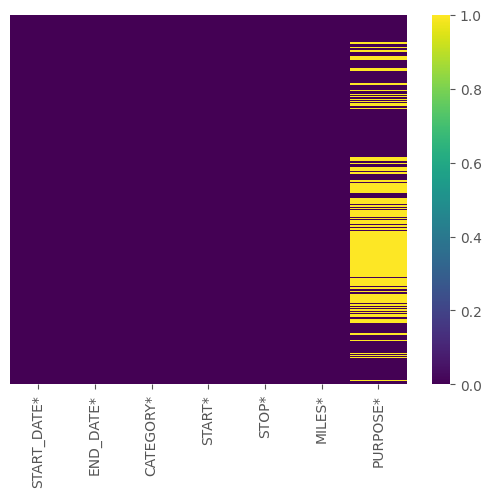

In [35]:
sns.heatmap(uber_data.isnull(), yticklabels=False, cmap = "viridis")


##Initial data (nameing it as 'df') with dropping the NA values.

<Axes: >

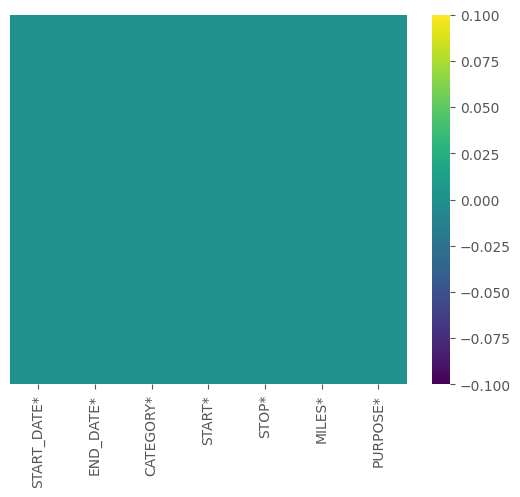

In [47]:
df =uber_data.dropna()
df.isnull().values.any()
#After Dropping the NA values
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis")


In [48]:
df.shape

(653, 7)

##The summary of the original data (before dropping the 'NA' values).

In [39]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


##The information of the new dataframe. (df)

In [40]:
df.describe()


,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [41]:
uber_data.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


##The unique **start** destinations.
###dataframe with 'na' values in the 'START' variable.

In [52]:
len(uber_data["START*"].unique())

177

In [54]:
a = set(uber_data["START*"])
len(a)

177

In [55]:
un_start_destination = uber_data["START*"].dropna()
unique_start = set(un_start_destination)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

##Total number of unique start destinations
###dataframe with no 'na' values in the 'START' variable.

In [56]:
len(unique_start)


176

##Total number of unique **stop** destinations.
###dataframe with no 'na' values in the 'STOP' variable.

In [57]:
b = set(uber_data["STOP*"])
len(b)

188

In [58]:
stop_destination = uber_data["STOP*"].dropna()
unique_stop = set(stop_destination)
len(unique_stop)

187

##Uber trips that has the starting point of San Francisco
###dataframe without dropping the 'na' values.

In [61]:
uber_data[uber_data['START*']=='San Francisco']
#OR
#uber_data.loc[uber_data["START*"] == "San Francisco"]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [62]:
len(uber_data[uber_data['START*']=='San Francisco'])

8

In [63]:
uber_data[uber_data['STOP*'].isin(['Katy','Berkeley'])]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
436,6/13/2016 18:08,6/13/2016 18:47,Business,Emeryville,Berkeley,3.9,Meal/Entertain
831,10/18/2016 19:03,10/18/2016 19:13,Business,Emeryville,Berkeley,3.0,NaN
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
840,10/20/2016 11:26,10/20/2016 11:34,Business,Emeryville,Berkeley,3.1,NaN
913,11-06-2016 16:27,11-06-2016 17:28,Business,Santa Clara,Berkeley,43.9,Customer Visit
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
921,11-08-2016 16:21,11-08-2016 16:34,Business,Emeryville,Berkeley,3.0,NaN
928,11-09-2016 20:52,11-09-2016 21:02,Business,Oakland,Berkeley,2.6,NaN


In [64]:
#Central,Austin,San Francisco
uber_data[uber_data['START*'].isin(['San Francisco','Central','Austin'])]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
929,11-09-2016 21:56,11-09-2016 22:02,Business,Central,Central,1.1,NaN
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
940,11-11-2016 18:30,11-11-2016 18:43,Business,Central,College Avenue,2.9,NaN


In [65]:
uber_data[uber_data['STOP*'].isin(['Katy','Berkeley']) | uber_data['START*'].isin(['San Francisco','Central','Austin'])]


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
436,6/13/2016 18:08,6/13/2016 18:47,Business,Emeryville,Berkeley,3.9,Meal/Entertain
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
831,10/18/2016 19:03,10/18/2016 19:13,Business,Emeryville,Berkeley,3.0,NaN
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
840,10/20/2016 11:26,10/20/2016 11:34,Business,Emeryville,Berkeley,3.1,NaN
913,11-06-2016 16:27,11-06-2016 17:28,Business,Santa Clara,Berkeley,43.9,Customer Visit
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting


##The **most popular starting point for the Uber drivers
###dataframe with no 'na' values in the 'START' variable.

In [66]:
starting_point = uber_data["START*"].dropna()
starting_point

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1150             Karachi
1151             Karachi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START*, Length: 1155, dtype: object

In [67]:
df = pd.DataFrame(starting_point.value_counts())
df

,START*
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Ridgeland,1
Daytona Beach,1
Sky Lake,1
Sand Lake Commons,1


In [68]:
df.sort_values(["START*"], ascending = False)
df = df.reset_index()
df.iloc[0,:]

index     Cary
START*     201
Name: 0, dtype: object

In [70]:
#df['START*'].value_counts().head(1)
starting_point = uber_data["START*"].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(["START*"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index':'starting_destination', 'START*':'Count'})
df.loc[df['Count'] == max(df['Count'])]

,starting_destination,Count
0,Cary,201


In [71]:
uber_data['START*'].value_counts().head(1)

Cary    201
Name: START*, dtype: int64

##The **Most popular dropping point** for the Uber drivers
###dataframe with no 'na' values in the 'STOP' variable.

In [75]:
#least popular dropping point
uber_data["STOP*"].value_counts().tail(1)

Ilukwatta    1
Name: STOP*, dtype: int64

In [74]:
#most popular dropping point
uber_data["STOP*"].value_counts().head(1)

Cary    203
Name: STOP*, dtype: int64

In [76]:
stopping_point = uber_data["STOP*"].dropna()
df = pd.DataFrame(stopping_point.value_counts())
df.sort_values(["STOP*"], ascending = False)

df = df.reset_index()
df = df.rename(columns = {'index':'stopping_destination', 'STOP*':'Count'})
df.loc[df['Count'] == max(df['Count'])]

,stopping_destination,Count
0,Cary,203


##The most frequent route taken by Uber drivers.
###dataframe with no 'na' values.

In [77]:
df = uber_data.dropna()
df = pd.DataFrame(df.groupby(['START*', 'STOP*']).size())
df = df.rename(columns = {0:'Count'})
df = df.sort_values(['Count'], ascending = False)
df.loc[df['Count'] == max(df['Count'])]

,,Count
START*,STOP*,
Cary,Morrisville,52


##Print all types of purposes for the trip in an array.
###dataframe with no 'na' values in the 'PURPOSE' variable.

In [79]:
print(np.array(uber_data['PURPOSE*'].dropna().unique()))
uber_data['MILES*'].groupby(uber_data['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

##Plot a bar graph of Purposes vs Distance.
###based on the original dataframe.

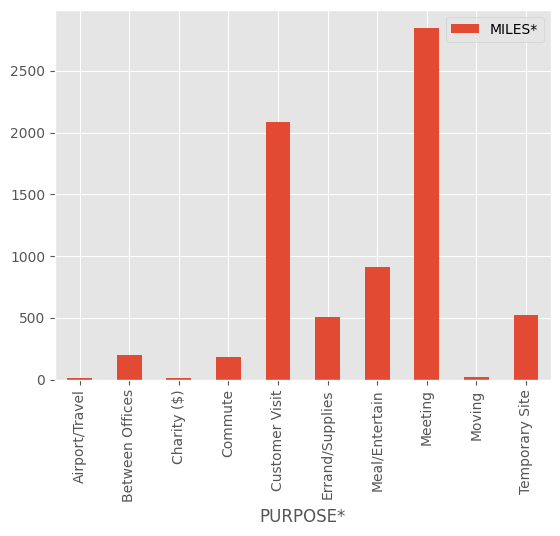

In [80]:
df = pd.DataFrame(uber_data['MILES*'].groupby(uber_data['PURPOSE*']).sum())
df.plot(kind = 'bar')
plt.show()

<Axes: xlabel='MILES*', ylabel='PURPOSE*'>

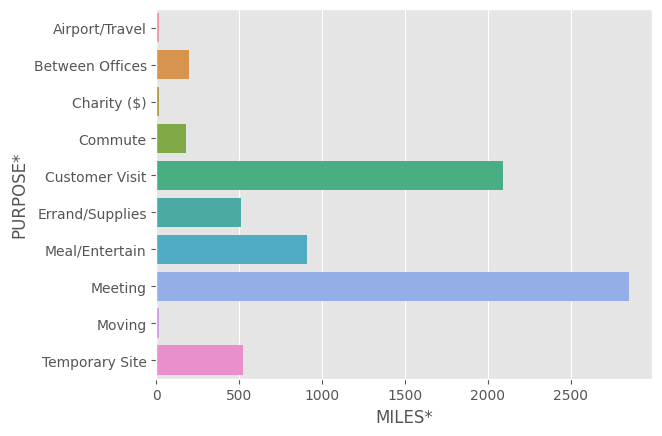

In [81]:
#OR
df = df.reset_index()
sns.barplot(x = df['MILES*'], y = df['PURPOSE*'])

## Print a dataframe of Purposes and the distance travelled for that particular Purpose.
###based on the original dataframe.

In [82]:
df

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


#Graphs

##Transforming the Data
Getting an hour, day, days of the week, a month from the date of the trip.

In [132]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], infer_datetime_format=True, errors='coerce')
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], infer_datetime_format=True, errors='coerce')

# Create empty lists for hour, day, dayofweek, month, and weekday
hour, day, dayofweek, month, weekday = [], [], [], [], []

for x in uber_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek if not pd.isnull(x) else None)
    month.append(x.month)
    weekday.append(calendar.day_name[int(x.dayofweek)] if not pd.isnull(x.dayofweek) else None)

# Add columns to the DataFrame
uber_data['HOUR'] = hour
uber_data['DAY'] = day
uber_data['DAY_OF_WEEK'] = dayofweek
uber_data['MONTH'] = month
uber_data['WEEKDAY'] = weekday

In [133]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,1.0,4.0,1.0,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,2.0,5.0,1.0,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,2.0,5.0,1.0,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,5.0,1.0,1.0,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,6.0,2.0,1.0,Wednesday


##Calculating Avg speed of the Trip

In [135]:
uber_data['TRAVELLING_TIME'] = uber_data['TRAVELLING_TIME']/60
uber_data['SPEED'] = uber_data['MILES*']/uber_data['TRAVELLING_TIME']
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,1.0,4.0,1.0,Friday,0.100000,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,2.0,5.0,1.0,Saturday,0.200000,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,2.0,5.0,1.0,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,5.0,1.0,1.0,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,6.0,2.0,1.0,Wednesday,1.116667,57.044776


##Plot number of trips vs Category of trips.

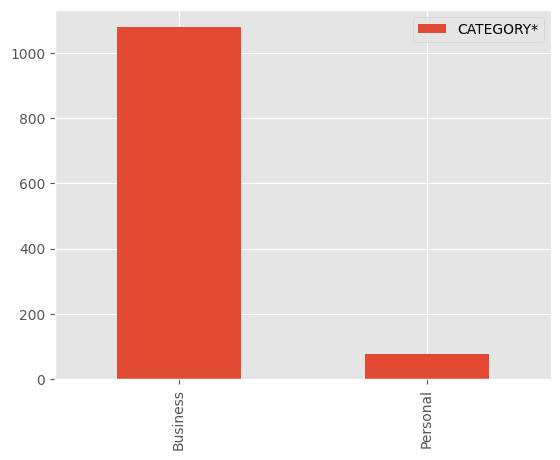

In [84]:
uber_data.head()

df = pd.DataFrame(uber_data['CATEGORY*'].value_counts())
df.reset_index()

df.plot(kind = 'bar')
plt.show()


##Histogram for miles. Most of people not having a long trip.

<Axes: ylabel='Frequency'>

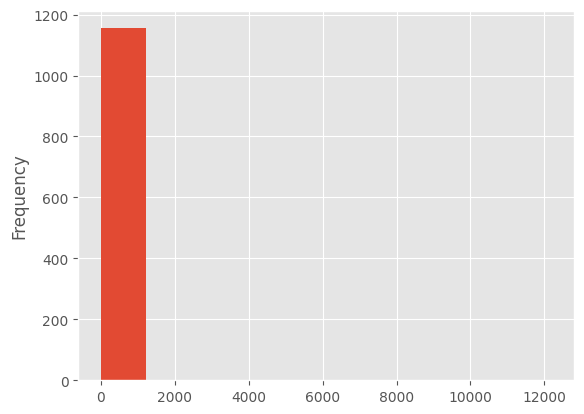

In [91]:
uber_data['MILES*'].plot.hist()

##Trips for purpose.
###Mostly the purpose of the trip is meeting and meal/entertain.

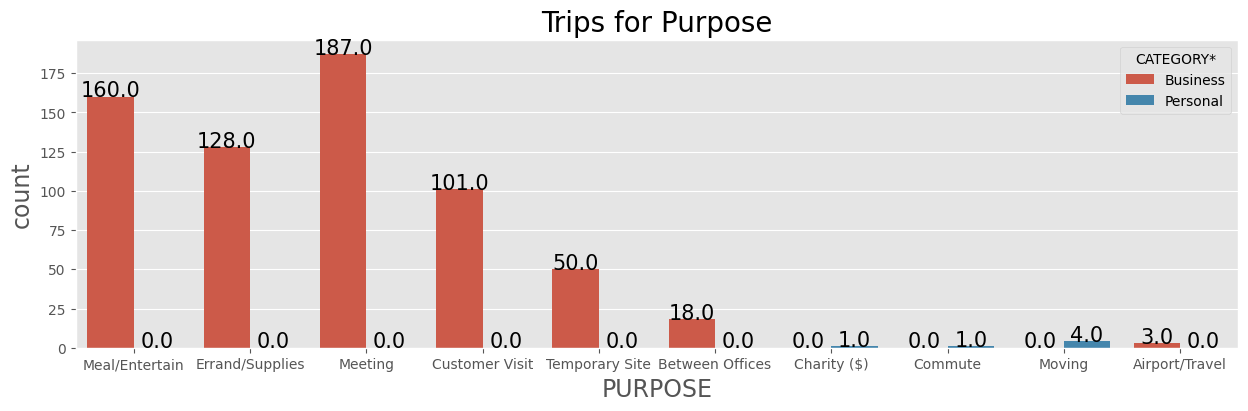

In [140]:


plt.figure(figsize=(15,4))
ax = sns.countplot(data=uber_data, x='PURPOSE*', hue='CATEGORY*')
ax.set_title("Trips for Purpose", fontsize=20)
plt.xlabel("PURPOSE", fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

plt.show()



##Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time.


<Axes: xlabel='PURPOSE*'>

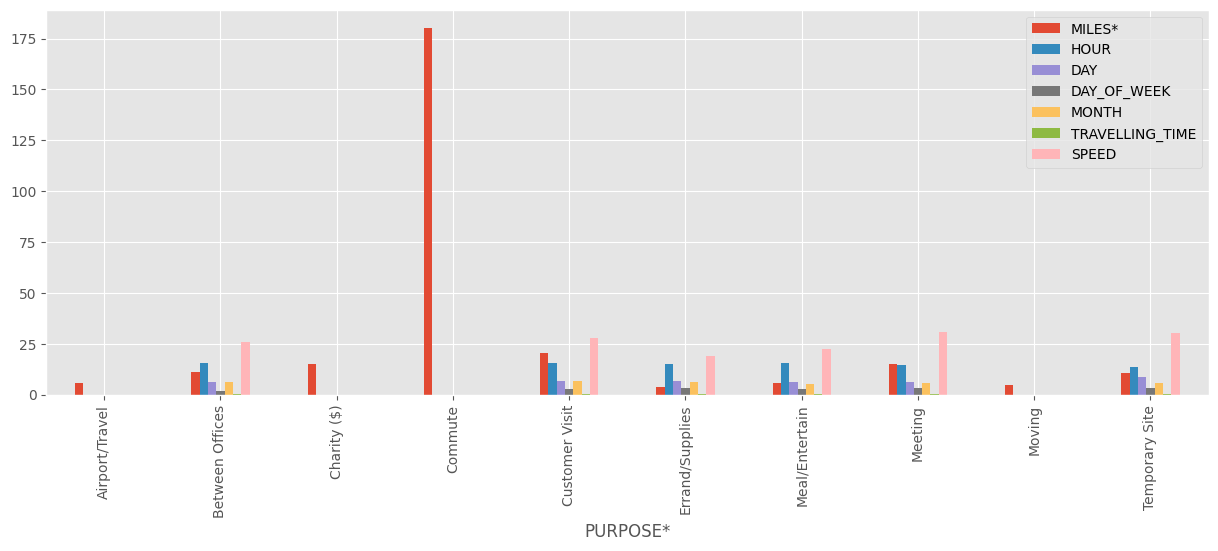

In [142]:
uber_data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))

##proportion of trips that is Business and what is the proportion of trips that is Personal

1.  The proportion calculation is with respect to the 'miles' variable.
2.  This question is based on the original dataframe.




In [89]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
df = uber_data.groupby(['CATEGORY*']).sum()
df

,MILES*
CATEGORY*,
Business,11487.0
Personal,717.7


In [90]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
df = uber_data.groupby(['CATEGORY*']).sum()
Business = df.iloc[0,0]/(df.iloc[0,0] + df.iloc[1,0])
Personal = df.iloc[1,0]/(df.iloc[0,0] + df.iloc[1,0])
#df
print("Business:", Business)
print("Personal:", Personal)

Business: 0.9411947856153776
Personal: 0.058805214384622315
